# Gradient Descent

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## Linear Algebra with Numpy

In [2]:
a = np.array([1, 3, 2, 4])

In [3]:
a

array([1, 3, 2, 4])

In [4]:
type(a)

numpy.ndarray

In [5]:
A = np.array([[3, 1, 2],
              [2, 3, 4]])

B = np.array([[0, 1],
              [2, 3],
              [4, 5]])

C = np.array([[0, 1],
              [2, 3],
              [4, 5],
              [0, 1],
              [2, 3],
              [4, 5]])

print("A is a {} matrix".format(A.shape))
print("B is a {} matrix".format(B.shape))
print("C is a {} matrix".format(C.shape))

A is a (2, 3) matrix
B is a (3, 2) matrix
C is a (6, 2) matrix


In [6]:
A[0]

array([3, 1, 2])

In [7]:
C[2, 0]

4

In [8]:
B[:, 0]

array([0, 2, 4])

### Elementwise operations

In [9]:
3 * A

array([[ 9,  3,  6],
       [ 6,  9, 12]])

In [10]:
A + A

array([[6, 2, 4],
       [4, 6, 8]])

In [11]:
A * A

array([[ 9,  1,  4],
       [ 4,  9, 16]])

In [12]:
A / A

array([[1., 1., 1.],
       [1., 1., 1.]])

In [13]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Uncomment the code in the next cells. You will see that tensors of different shape cannot be added or multiplied:

In [14]:
# A + B

In [15]:
# A * B

### Dot product

In [16]:
A.shape

(2, 3)

In [17]:
B.shape

(3, 2)

In [18]:
A.dot(B)

array([[10, 16],
       [22, 31]])

In [19]:
np.dot(A, B)

array([[10, 16],
       [22, 31]])

In [20]:
B.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

In [21]:
C.shape

(6, 2)

In [22]:
A.shape

(2, 3)

In [23]:
C.dot(A)

array([[ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28],
       [ 2,  3,  4],
       [12, 11, 16],
       [22, 19, 28]])

Uncomment the code in the next cell to visualize the error:

In [24]:
# A.dot(C)

## Gradient descent

![](../data/banknotes.png)

In [25]:
df = pd.read_csv('../data/banknotes.csv')

In [26]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
df.columns

Index(['variace', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

LinAlgError: singular matrix

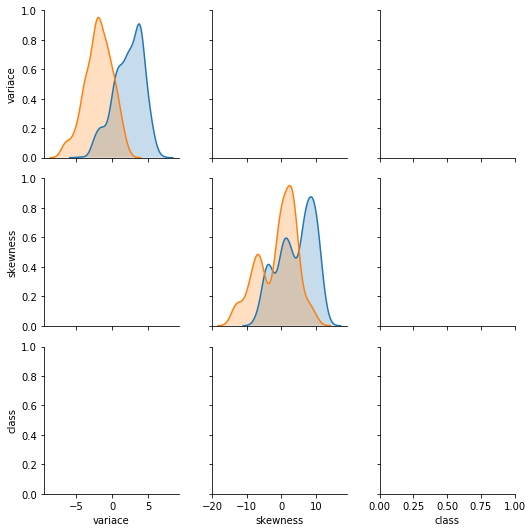

In [29]:
import seaborn as sns
sns.pairplot(df[["variace", "skewness", "class"]], hue="class")

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

In [31]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

In [32]:
model = RandomForestClassifier()
cross_val_score(model, X, y)

/Users/zzhang/Envs/ds_py3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/zzhang/Envs/ds_py3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/zzhang/Envs/ds_py3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/zzhang/Envs/ds_py3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.98908297, 0.99124726, 0.99343545])

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [40]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,)
result = model.evaluate(X_test, y_test,  verbose=0)

Train on 960 samples
Epoch 1/10
960/960 [==============================] - 0s 312us/sample - loss: 1.1007 - accuracy: 0.4646
Epoch 2/10
960/960 [==============================] - 0s 26us/sample - loss: 0.9514 - accuracy: 0.5000
Epoch 3/10
960/960 [==============================] - 0s 31us/sample - loss: 0.8244 - accuracy: 0.5333
Epoch 4/10
960/960 [==============================] - 0s 27us/sample - loss: 0.7201 - accuracy: 0.5792
Epoch 5/10
960/960 [==============================] - 0s 31us/sample - loss: 0.6368 - accuracy: 0.6573
Epoch 6/10
960/960 [==============================] - 0s 28us/sample - loss: 0.5716 - accuracy: 0.7302
Epoch 7/10
960/960 [==============================] - 0s 29us/sample - loss: 0.5209 - accuracy: 0.7896
Epoch 8/10
960/960 [==============================] - 0s 30us/sample - loss: 0.4816 - accuracy: 0.8469
Epoch 9/10
960/960 [==============================] - 0s 30us/sample - loss: 0.4508 - accuracy: 0.8823
Epoch 10/10
960/960 [==============================

In [41]:
historydf = pd.DataFrame(history.history, index=history.epoch)

In [42]:
historydf

,loss,accuracy
0,1.100704,0.464583
1,0.951415,0.500000
2,0.824446,0.533333
3,0.720103,0.579167
4,0.636815,0.657292
5,0.571593,0.730208
6,0.520900,0.789583
7,0.481580,0.846875
8,0.450781,0.882292
9,0.426200,0.909375


Text(0.5, 1.0, 'Test accuracy: 93.4 %')

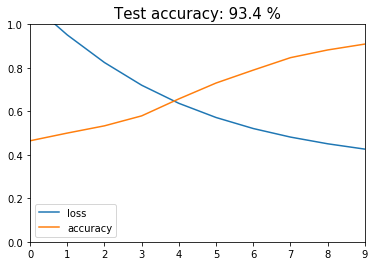

In [43]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [56]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=16, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [57]:
historydf = pd.concat(dflist, axis=1)

In [58]:
historydf

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,0.625369,0.620833,0.954245,0.401042,0.464112,0.878125,0.244808,0.939583
1,0.537385,0.679167,0.545854,0.700000,0.264956,0.948958,0.118660,0.968750
2,0.470716,0.767708,0.422749,0.797917,0.210062,0.955208,0.091625,0.977083
3,0.420469,0.839583,0.351469,0.848958,0.178222,0.962500,0.078154,0.977083
4,0.382594,0.891667,0.302047,0.889583,0.156868,0.965625,0.070028,0.978125
5,0.353636,0.919792,0.265569,0.923958,0.141265,0.968750,0.064173,0.980208
6,0.331039,0.930208,0.237588,0.934375,0.129224,0.968750,0.060269,0.981250
7,0.312942,0.931250,0.215461,0.950000,0.119974,0.969792,0.057035,0.981250
8,0.298113,0.931250,0.197631,0.953125,0.112354,0.969792,0.054420,0.981250
9,0.285622,0.932292,0.183040,0.959375,0.106005,0.971875,0.052211,0.981250


In [61]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [62]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              0.625369  0.620833  0.954245  0.401042  0.464112  0.878125   
1              0.537385  0.679167  0.545854  0.700000  0.264956  0.948958   
2              0.470716  0.767708  0.422749  0.797917  0.210062  0.955208   
3              0.420469  0.839583  0.351469  0.848958  0.178222  0.962500   
4              0.382594  0.891667  0.302047  0.889583  0.156868  0.965625   
5              0.353636  0.919792  0.265569  0.923958  0.141265  0.968750   
6              0.331039  0.930208  0.237588  0.934375  0.129224  0.968750   
7              0.312942  0.931250  0.215461  0.950000  0.119974  0.969792   
8              0.298113  0.931250  0.197631  0.953125  0.112354  0.969792   
9              0.285622  0.932292  0.183040  0.959375  0.106005  0.971875   
10             0.274925  0.933333  0.170890  0.961458  0.100793  0.973958   
11             0.265627  0.936458  0.160614  0.961458  0.096206  0.973958   
12             0.257395  0.941667  0.151825  0.964583  0.092310  0.973958   
13             0.250014  0.939583  0.144219  0.965625  0.088867  0.975000   
14             0.243351  0.940625  0.137578  0.968750  0.085827  0.977083   
15             0.237268  0.941667  0.131743  0.968750  0.083196  0.976042   

learning_rate      0.50            
metric             loss  accuracy  
0              0.244808  0.939583  
1              0.118660  0.968750  
2              0.091625  0.977083  
3              0.078154  0.977083  
4              0.070028  0.978125  
5              0.064173  0.980208  
6              0.060269  0.981250  
7              0.057035  0.981250  
8              0.054420  0.981250  
9              0.052211  0.981250  
10             0.050360  0.981250  
11             0.048772  0.981250  
12             0.047496  0.981250  
13             0.046083  0.981250  
14             0.045174  0.983333  
15             0.044153  0.982292

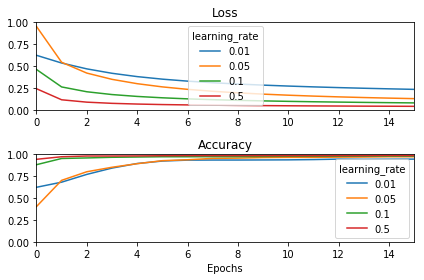

In [63]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [69]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=20, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [70]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [71]:
historydf

batch_size       16                  32                  64             \
metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.487789  0.779167  0.680945  0.630208  0.619648  0.626042   
1           0.459473  0.798958  0.639959  0.648958  0.611191  0.630208   
2           0.435797  0.819792  0.603523  0.665625  0.602961  0.633333   
3           0.415535  0.826042  0.571303  0.688542  0.594953  0.641667   
4           0.397835  0.833333  0.542939  0.713542  0.587140  0.648958   
5           0.382106  0.843750  0.517963  0.738542  0.579561  0.653125   
6           0.367951  0.855208  0.495945  0.763542  0.572168  0.659375   
7           0.355115  0.864583  0.476464  0.778125  0.564922  0.666667   
8           0.343317  0.875000  0.459169  0.796875  0.557887  0.675000   
9           0.332474  0.880208  0.443752  0.808333  0.551017  0.685417   
10          0.322340  0.886458  0.429988  0.820833  0.544303  0.692708   
11          0.312973  0.896875  0.417530  0.828125  0.537739  0.698958   
12          0.304173  0.903125  0.406254  0.831250  0.531332  0.705208   
13          0.295927  0.908333  0.395963  0.832292  0.525075  0.711458   
14          0.288189  0.913542  0.386504  0.838542  0.518963  0.716667   
15          0.280880  0.915625  0.377818  0.842708  0.512960  0.721875   
16          0.273975  0.915625  0.369736  0.844792  0.507106  0.728125   
17          0.267421  0.917708  0.362242  0.848958  0.501367  0.736458   
18          0.261234  0.919792  0.355230  0.851042  0.495752  0.738542   
19          0.255341  0.920833  0.348621  0.858333  0.490259  0.741667   

batch_size       128            
metric          loss  accuracy  
0           1.407490  0.352083  
1           1.357177  0.355208  
2           1.307932  0.359375  
3           1.260358  0.368750  
4           1.214399  0.376042  
5           1.169307  0.383333  
6           1.126254  0.392708  
7           1.084940  0.397917  
8           1.045050  0.408333  
9           1.005900  0.411458  
10          0.968744  0.433333  
11          0.933422  0.450000  
12          0.899283  0.471875  
13          0.866813  0.486458  
14          0.836453  0.511458  
15          0.807455  0.531250  
16          0.779460  0.547917  
17          0.753185  0.566667  
18          0.728011  0.578125  
19          0.704725  0.608333

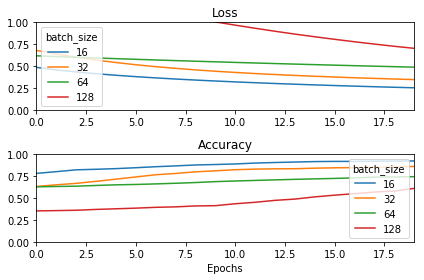

In [72]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [74]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [75]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [76]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

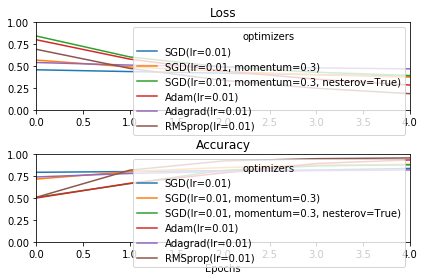

In [78]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [79]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=5, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [80]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

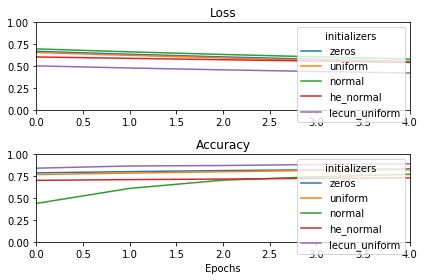

In [81]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Inner layer representation

In [83]:
K.clear_session()

model = Sequential()
model.add(Dense(2, input_shape=(4,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

h = model.fit(X_train, y_train, batch_size=16, epochs=20,
              verbose=1, validation_split=0.3)
result = model.evaluate(X_test, y_test, verbose=0)

Train on 672 samples, validate on 288 samples
Epoch 1/20
672/672 [==============================] - 1s 761us/sample - loss: 0.6385 - accuracy: 0.6994 - val_loss: 0.5582 - val_accuracy: 0.7951
Epoch 2/20
672/672 [==============================] - 0s 86us/sample - loss: 0.4379 - accuracy: 0.8646 - val_loss: 0.3975 - val_accuracy: 0.8785
Epoch 3/20
672/672 [==============================] - 0s 84us/sample - loss: 0.3126 - accuracy: 0.9226 - val_loss: 0.2821 - val_accuracy: 0.9618
Epoch 4/20
672/672 [==============================] - 0s 81us/sample - loss: 0.2257 - accuracy: 0.9643 - val_loss: 0.2019 - val_accuracy: 0.9757
Epoch 5/20
672/672 [==============================] - 0s 86us/sample - loss: 0.1638 - accuracy: 0.9762 - val_loss: 0.1458 - val_accuracy: 0.9826
Epoch 6/20
672/672 [==============================] - 0s 89us/sample - loss: 0.1231 - accuracy: 0.9807 - val_loss: 0.1119 - val_accuracy: 0.9861
Epoch 7/20
672/672 [==============================] - 0s 92us/sample - loss: 0.0973

In [84]:
result

[0.03363971397714707, 0.9878641]

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.layers

In [87]:
inp = model.layers[0].input
out = model.layers[0].output

In [88]:
inp

<tf.Tensor 'dense_input:0' shape=(None, 4) dtype=float32>

In [89]:
out

<tf.Tensor 'dense/Identity:0' shape=(None, 2) dtype=float32>

In [90]:
features_function = K.function([inp], [out])

In [91]:
features_function

In [92]:
features_function([X_test])[0].shape

(412, 2)

In [93]:
features = features_function([X_test])[0]

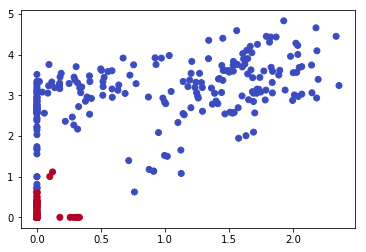

In [94]:
plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')

In [95]:
K.clear_session()

model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              metrics=['accuracy'])

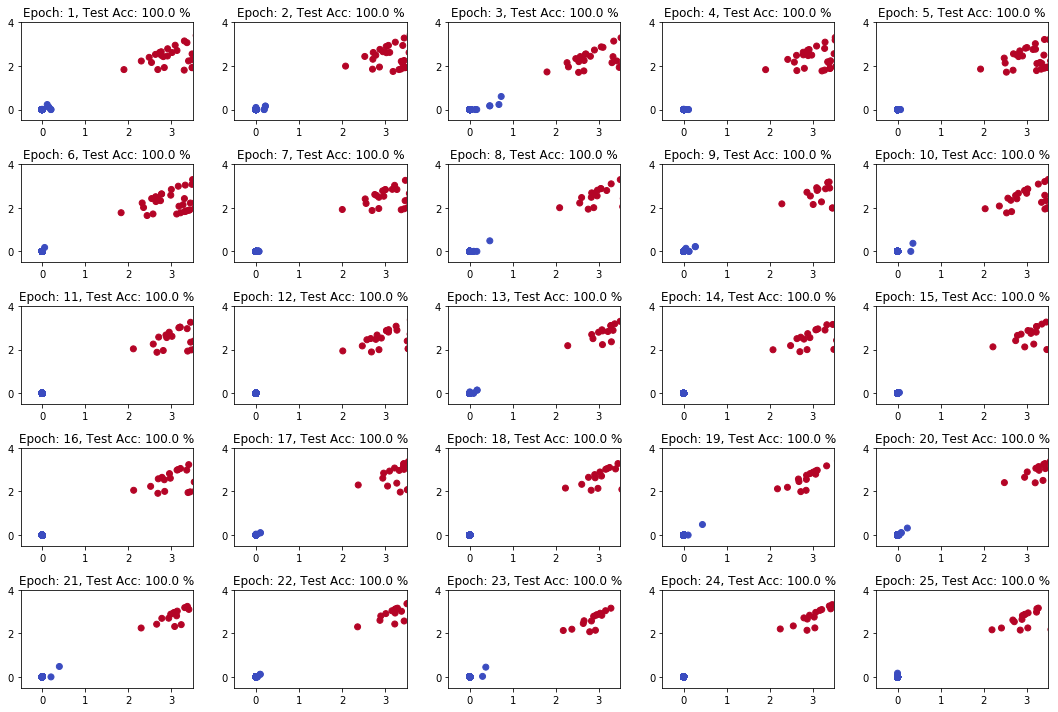

In [97]:
inp = model.layers[0].input
out = model.layers[1].output
features_function = K.function([inp], [out])

plt.figure(figsize=(15,10))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    h = model.fit(X_train, y_train, batch_size=16, epochs=1, verbose=0)
    test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
    features = features_function([X_test])[0]
    plt.scatter(features[:, 0], features[:, 1], c=y_test, cmap='coolwarm')
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 4.0)
    plt.title('Epoch: {}, Test Acc: {:3.1f} %'.format(i, test_accuracy * 100.0))

plt.tight_layout()

### Exercise 1

You've just been hired at a wine company and they would like you to help them build a model that predicts the quality of their wine based on several measurements. They give you a dataset with wine

- Load the ../data/wines.csv into Pandas
- Use the column called "Class" as target
- Check how many classes are there in target, and if necessary use dummy columns for a multi-class classification
- Use all the other columns as features, check their range and distribution (using seaborn pairplot)
- Rescale all the features using either MinMaxScaler or StandardScaler
- Build a deep model with at least 1 hidden layer to classify the data
- Choose the cost function, what will you use? Mean Squared Error? Binary Cross-Entropy? Categorical Cross-Entropy?
- Choose an optimizer
- Choose a value for the learning rate, you may want to try with several values
- Choose a batch size
- Train your model on all the data using a `validation_split=0.2`. Can you converge to 100% validation accuracy?
- What's the minumum number of epochs to converge?
- Repeat the training several times to verify how stable your results are

### Exercise 2

Since this dataset has 13 features we can only visualize pairs of features like we did in the Paired plot. We could however exploit the fact that a neural network is a function to extract 2 high level features to represent our data.

- Build a deep fully connected network with the following structure:
    - Layer 1: 8 nodes
    - Layer 2: 5 nodes
    - Layer 3: 2 nodes
    - Output : 3 nodes
- Choose activation functions, inizializations, optimizer and learning rate so that it converges to 100% accuracy within 20 epochs (not easy)
- Remember to train the model on the scaled data
- Define a Feature Funtion like we did above between the input of the 1st layer and the output of the 3rd layer
- Calculate the features and plot them on a 2-dimensional scatter plot
- Can we distinguish the 3 classes well?


### Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its [documentation here](https://keras.io/getting-started/functional-api-guide/). Let's see how we can leverage it.

- define an input layer called `inputs`
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a `second_to_last` layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

### Exercise 4 

Keras offers the possibility to call a function at each epoch. These are Callbacks, and their [documentation is here](https://keras.io/callbacks/). Callbacks allow us to add some neat functionality. In this exercise we'll explore a few of them.

- Split the data into train and test sets with a test_size = 0.3 and random_state=42
- Reset and recompile your model
- train the model on the train data using `validation_data=(X_test, y_test)`
- Use the `EarlyStopping` callback to stop your training if the `val_loss` doesn't improve
- Use the `ModelCheckpoint` callback to save the trained model to disk once training is finished
- Use the `TensorBoard` callback to output your training information to a `/tmp/` subdirectory
- Watch the next video for an overview of tensorboard